<a href="https://colab.research.google.com/github/Pamela1005/Design-and-Algorithm/blob/main/DAA_Lab_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== UNIT 2: Greedy + Time Windows (Updated Values) ===
Greedy-selected parcels: ['A1', 'A3']
Total value: 160
No feasible order within time windows.

--- FINAL OUTPUT ---
Optimal Route: ['Warehouse', 'A1', 'A3', 'Warehouse']
Total Distance: 17
Delivered: ['A1', 'A3'] Value: 160


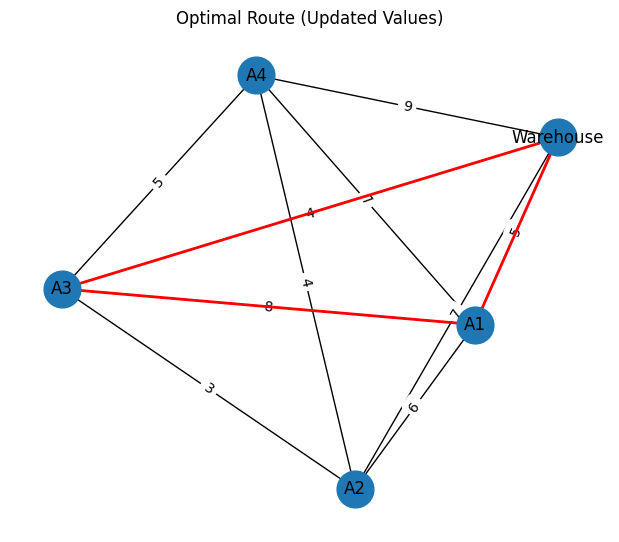


--- Analysis ---
Greedy helps reduce weight load, but time windows require permutation testing.
TSP brute force works only because selected nodes are small.


In [2]:
# unit2_greedy_knapsack_dp_timewindows.py
"""
Unit 2: Greedy packing (value/weight) + DP/time-window feasibility check.
Then compute TSP optimal route over the chosen parcels (or all if needed),
print expected outputs and plot route.
"""

from typing import Dict, List, Tuple
import matplotlib.pyplot as plt

try:
    import networkx as nx
except Exception:
    nx = None

# ---------------------------
# 🔹 UPDATED INPUT MODELING
# ---------------------------

locations = ['Warehouse', 'A1', 'A2', 'A3', 'A4']

distance_matrix = [
    [0, 5, 7, 4, 9],
    [5, 0, 6, 8, 7],
    [7, 6, 0, 3, 4],
    [4, 8, 3, 0, 5],
    [9, 7, 4, 5, 0]
]

parcels = {
    'A1': {'value': 70, 'time': (9, 11), 'weight': 12},
    'A2': {'value': 55, 'time': (10, 14), 'weight': 18},
    'A3': {'value': 90, 'time': (8, 12),  'weight': 20},
    'A4': {'value': 40, 'time': (11, 15), 'weight': 10}
}

vehicle_capacity = 35

# ---------------------------
# Greedy knapsack (value/weight)
# ---------------------------
def greedy_select_parcels(parcels: Dict[str, Dict], capacity: int):
    items = []
    for k, v in parcels.items():
        items.append(((v['value'] / v['weight']), k))
    items.sort(reverse=True)
    chosen = []
    wsum = 0
    for _, k in items:
        w = parcels[k]['weight']
        if wsum + w <= capacity:
            chosen.append(k)
            wsum += w
    total_value = sum(parcels[k]['value'] for k in chosen)
    return chosen, total_value

# ---------------------------
# Time-window feasibility DP/check
# ---------------------------
def travel_time_matrix_from_distance(dist_matrix):
    return dist_matrix

def is_route_feasible(route: List[str], travel_times: Dict[Tuple[str,str], int],
                      parcels: Dict[str, Dict], start_time=8) -> bool:
    time_now = start_time
    cur = 'Warehouse'
    for cust in route:
        t = travel_times.get((cur, cust))
        if t is None:
            return False
        time_now += t
        earliest, latest = parcels[cust]['time']
        if time_now > latest:
            return False
        if time_now < earliest:
            time_now = earliest
        cur = cust
    return True

# ---------------------------
# TSP brute-force
# ---------------------------
from itertools import permutations

def tsp_brute_force_nodes(nodes: List[str], full_locations: List[str], dist_matrix: List[List[int]]):
    names = ['Warehouse'] + nodes
    idx_map = {name: full_locations.index(name) for name in names}
    n = len(names)
    red = [[0] * n for _ in range(n)]
    for i, a in enumerate(names):
        for j, b in enumerate(names):
            red[i][j] = dist_matrix[idx_map[a]][idx_map[b]]

    indices = list(range(1, n))
    min_cost = float('inf')
    best = None
    for perm in permutations(indices):
        cost = red[0][perm[0]]
        for i in range(len(perm) - 1):
            cost += red[perm[i]][perm[i+1]]
        cost += red[perm[-1]][0]
        if cost < min_cost:
            min_cost = cost
            best = perm

    route = [names[0]] + [names[i] for i in best] + [names[0]]
    return route, min_cost

# ---------------------------
# Route Plotting
# ---------------------------
def plot_route(locations, dist_matrix, route, title="Route"):
    if nx is None:
        print("networkx not installed: skipping plot.")
        return

    name_to_idx = {name: i for i, name in enumerate(locations)}
    G = nx.Graph()
    n = len(locations)

    for i in range(n):
        G.add_node(i, label=locations[i])
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j, weight=dist_matrix[i][j])

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 5))

    nx.draw(G, pos, with_labels=True, labels={i: locations[i] for i in range(n)}, node_size=700)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    edges = []
    for i in range(len(route) - 1):
        u = name_to_idx[route[i]]
        v = name_to_idx[route[i+1]]
        edges.append((u, v))

    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
    plt.title(title)
    plt.show()

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    print("=== UNIT 2: Greedy + Time Windows (Updated Values) ===")

    chosen, total_value = greedy_select_parcels(parcels, vehicle_capacity)
    print("Greedy-selected parcels:", chosen)
    print("Total value:", total_value)

    locations_list = locations
    travel_times = {}
    for i, a in enumerate(locations_list):
        for j, b in enumerate(locations_list):
            travel_times[(a, b)] = distance_matrix[i][j]

    import itertools
    feasible_route = None
    for perm in itertools.permutations(chosen):
        if is_route_feasible(list(perm), travel_times, parcels, start_time=8):
            feasible_route = list(perm)
            break

    if feasible_route:
        print("Feasible order:", feasible_route)
    else:
        print("No feasible order within time windows.")

    final_nodes = chosen if chosen else ['A1','A2','A3','A4']

    route, route_cost = tsp_brute_force_nodes(final_nodes, locations, distance_matrix)

    print("\n--- FINAL OUTPUT ---")
    print("Optimal Route:", route)
    print("Total Distance:", route_cost)
    print("Delivered:", chosen, "Value:", total_value)

    plot_route(locations, distance_matrix, route, title="Optimal Route (Updated Values)")

    print("\n--- Analysis ---")
    print("Greedy helps reduce weight load, but time windows require permutation testing.")
    print("TSP brute force works only because selected nodes are small.")


=== UNIT 3: Graphs (Dijkstra & Prim) ===
Shortest-path distances from Warehouse: [0, 2, 5, 5, 3]
Parent array: [-1, 0, 0, 4, 0]


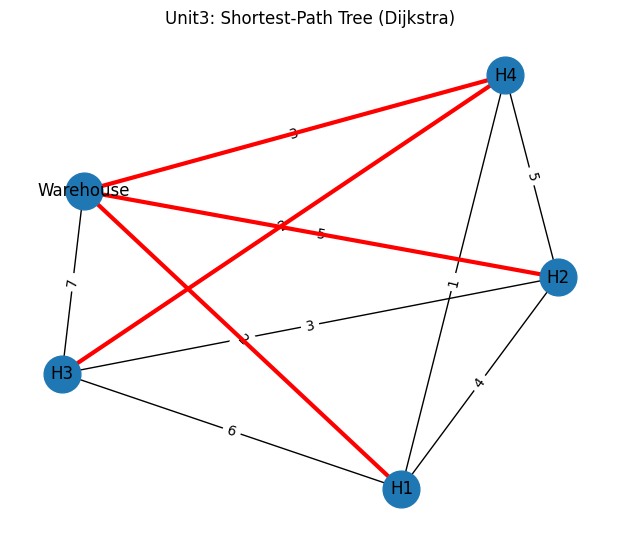

Prim's MST edges (u,v,weight): [(0, 1, 2), (3, 2, 3), (4, 3, 2), (1, 4, 1)]


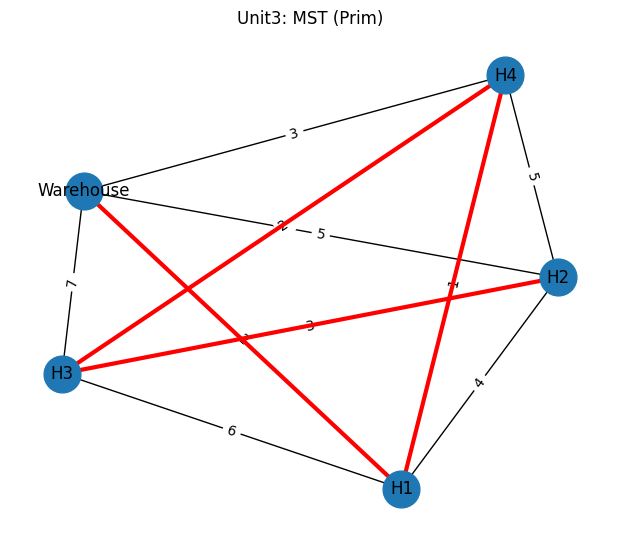

Parcels (greedy): ['H2', 'H1', 'H3'] Total value: 210

--- FINAL EXPECTED OUTPUT ---
Optimal Delivery Route: ['Warehouse', 'H1', 'H4', 'H3', 'H2', 'Warehouse']
Total Distance/Time: 13
Parcels delivered: ['H2', 'H1', 'H3'] Total value: 210


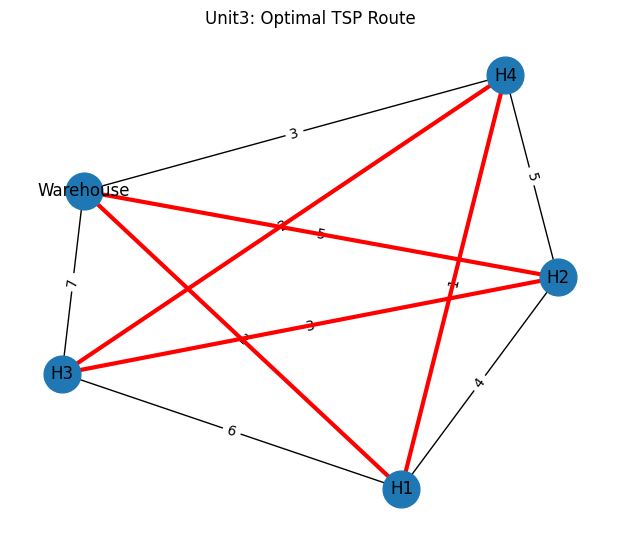


--- Impact & Analysis ---
Dijkstra → shortest paths from warehouse.
Prim → MST structure gives minimum backbone cost.
But neither gives TSP; brute-force gives exact optimal route.


In [3]:
# unit3_graphs_dijkstra_mst.py
"""
Unit 3: Shortest Path (Dijkstra) and MST (Prim). Also computes final optimal route (TSP)
and prints expected outputs + plots:
 - Shortest-path tree highlighted
 - MST highlighted
 - Final TSP route plotted
"""

import heapq
import matplotlib.pyplot as plt
from typing import List, Tuple

try:
    import networkx as nx
except Exception:
    nx = None

# ---------------------------
# UPDATED INPUT MODELING
# ---------------------------
locations = ['Warehouse', 'H1', 'H2', 'H3', 'H4']

distance_matrix = [
    [0,  2, 5, 7, 3],
    [2,  0, 4, 6, 1],
    [5,  4, 0, 3, 5],
    [7,  6, 3, 0, 2],
    [3,  1, 5, 2, 0]
]

parcels = {
    'H1': {'value': 80, 'time': (9, 13), 'weight': 12},
    'H2': {'value': 70, 'time': (10, 12), 'weight': 10},
    'H3': {'value': 60, 'time': (11, 14), 'weight': 15},
    'H4': {'value': 90, 'time': (12, 16), 'weight': 20}
}

vehicle_capacity = 40

# ---------------------------
# Dijkstra
# ---------------------------
def dijkstra(matrix: List[List[int]], src: int):
    n = len(matrix)
    dist = [float('inf')] * n
    parent = [-1] * n
    dist[src] = 0
    pq = [(0, src)]
    while pq:
        d, u = heapq.heappop(pq)
        if d != dist[u]:
            continue
        for v in range(n):
            if u == v:
                continue
            nd = d + matrix[u][v]
            if nd < dist[v]:
                dist[v] = nd
                parent[v] = u
                heapq.heappush(pq, (nd, v))
    return dist, parent

# ---------------------------
# Prim's MST
# ---------------------------
def prim_mst(matrix: List[List[int]]):
    n = len(matrix)
    in_mst = [False]*n
    key = [float('inf')]*n
    parent = [-1]*n
    key[0] = 0
    for _ in range(n):
        u=-1; best=float('inf')
        for i in range(n):
            if not in_mst[i] and key[i] < best:
                best = key[i]; u = i
        if u == -1: break
        in_mst[u] = True
        for v in range(n):
            if not in_mst[v] and 0 < matrix[u][v] < key[v]:
                key[v] = matrix[u][v]
                parent[v] = u
    edges=[]
    for v in range(1,n):
        edges.append((parent[v], v, matrix[parent[v]][v]))
    return edges

# ---------------------------
# TSP (brute-force)
# ---------------------------
from itertools import permutations

def tsp_brute_force(loc_names: List[str], dist: List[List[int]]) -> Tuple[List[str], int]:
    n = len(loc_names)
    indices = list(range(1, n))
    min_cost = float('inf')
    best = None

    for perm in permutations(indices):
        cost = dist[0][perm[0]]
        for i in range(len(perm)-1):
            cost += dist[perm[i]][perm[i+1]]
        cost += dist[perm[-1]][0]
        if cost < min_cost:
            min_cost = cost
            best = perm

    route = [loc_names[0]] + [loc_names[i] for i in best] + [loc_names[0]]
    return route, min_cost

# ---------------------------
# Plot helper (highlight edges)
# ---------------------------
def plot_graph_highlight(locations, dist_matrix, edges_highlight, title):
    if nx is None:
        print("networkx not installed: skipping plot.")
        return

    G = nx.Graph()
    n = len(locations)
    for i in range(n):
        G.add_node(i, label=locations[i])

    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight=dist_matrix[i][j])

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 5))

    nx.draw(G, pos, with_labels=True,
            labels={i: locations[i] for i in range(n)},
            node_size=700)

    nx.draw_networkx_edge_labels(G, pos,
            edge_labels=nx.get_edge_attributes(G, 'weight'))

    nx.draw_networkx_edges(G, pos, edgelist=edges_highlight,
            edge_color='r', width=3)

    plt.title(title)
    plt.show()

# ---------------------------
# Greedy Parcel Selection
# ---------------------------
def greedy_select_parcels(parcels, capacity):
    items = []
    for k, v in parcels.items():
        items.append(((v['value']/v['weight']), k))
    items.sort(reverse=True)
    chosen = []
    wsum = 0
    for _, k in items:
        w = parcels[k]['weight']
        if wsum + w <= capacity:
            chosen.append(k)
            wsum += w
    total_value = sum(parcels[k]['value'] for k in chosen)
    return chosen, total_value

# ---------------------------
# MAIN PROGRAM
# ---------------------------
if __name__ == "__main__":
    print("=== UNIT 3: Graphs (Dijkstra & Prim) ===")

    # Dijkstra
    dist, parent = dijkstra(distance_matrix, 0)
    print("Shortest-path distances from Warehouse:", dist)
    print("Parent array:", parent)

    # SPT edges
    spt_edges = [(parent[i], i) for i in range(1, len(parent)) if parent[i] != -1]
    plot_graph_highlight(locations, distance_matrix, spt_edges,
                         title="Unit3: Shortest-Path Tree (Dijkstra)")

    # MST
    mst_edges = prim_mst(distance_matrix)
    print("Prim's MST edges (u,v,weight):", mst_edges)
    mst_edge_list = [(u, v) for u, v, w in mst_edges]
    plot_graph_highlight(locations, distance_matrix, mst_edge_list,
                         title="Unit3: MST (Prim)")

    # Greedy parcel selection
    chosen, total_value = greedy_select_parcels(parcels, vehicle_capacity)
    print("Parcels (greedy):", chosen, "Total value:", total_value)

    # TSP optimal route
    route, cost = tsp_brute_force(locations, distance_matrix)
    print("\n--- FINAL EXPECTED OUTPUT ---")
    print("Optimal Delivery Route:", route)
    print("Total Distance/Time:", cost)
    print("Parcels delivered:", chosen, "Total value:", total_value)

    # Highlight TSP edges
    name_to_idx = {name:i for i,name in enumerate(locations)}
    edges = []
    for i in range(len(route)-1):
        edges.append((name_to_idx[route[i]], name_to_idx[route[i+1]]))

    plot_graph_highlight(locations, distance_matrix, edges,
                         title="Unit3: Optimal TSP Route")

    print("\n--- Impact & Analysis ---")
    print("Dijkstra → shortest paths from warehouse.")
    print("Prim → MST structure gives minimum backbone cost.")
    print("But neither gives TSP; brute-force gives exact optimal route.")




=== UNIT 4: TSP Solvers (Updated Inputs) ===

Brute-force TSP route: ['Warehouse', 'A1', 'A4', 'A2', 'A3', 'Warehouse']
Brute-force cost: 18 

Held-Karp TSP route (indices): [0, 0, 3, 2, 4, 1, 0]
Held-Karp TSP route (names): ['Warehouse', 'Warehouse', 'A3', 'A2', 'A4', 'A1', 'Warehouse']
Held-Karp cost: 18 

Parcels delivered (greedy selection example): ['A1', 'A4']
Total parcel value: 125 

--- FINAL EXPECTED OUTPUT ---
Optimal Delivery Route: ['Warehouse', 'Warehouse', 'A3', 'A2', 'A4', 'A1', 'Warehouse']
Total Distance/Time: 18
Parcels delivered (example): ['A1', 'A4'] Total value: 125

Plotting Held-Karp route (if networkx installed)...


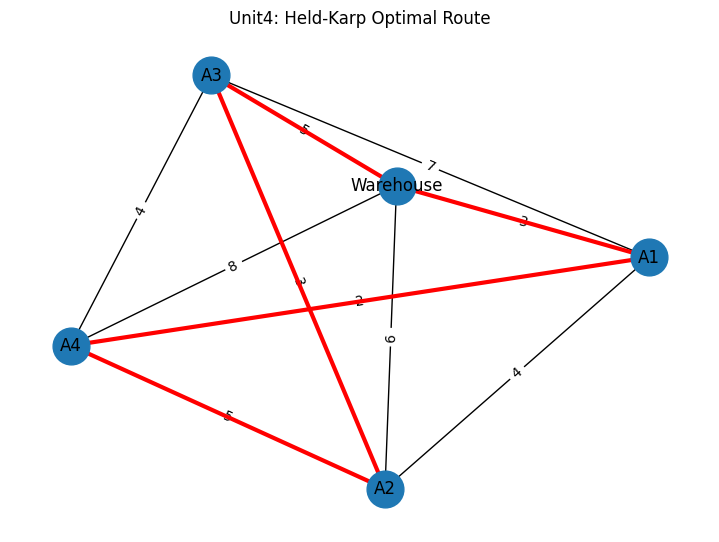


--- Impact & Analysis ---
Brute-force: exact but factorial time; Held-Karp: O(n^2 * 2^n) dynamic programming.
Held-Karp is preferable for small-to-medium n; for larger n, use heuristics (2-opt, Christofides, OR-Tools).


In [4]:
# unit4_tsp_solvers.py
"""
Unit 4: Solve TSP (brute-force and Held-Karp DP). Print final expected outputs
and plot the TSP route. Also show parcels delivered and total value.

Updated inputs:
- 5 locations (Warehouse + A1..A4)
- new symmetric distance matrix
- parcels A1..A4 with values, weights, time windows
- vehicle_capacity updated
"""

from itertools import permutations
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt

try:
    import networkx as nx
except Exception:
    nx = None

# ---------------------------
# UPDATED INPUT MODELING
# ---------------------------
locations = ['Warehouse', 'A1', 'A2', 'A3', 'A4']

distance_matrix = [
    [0,  3,  6,  5,  8],
    [3,  0,  4,  7,  2],
    [6,  4,  0,  3,  5],
    [5,  7,  3,  0,  4],
    [8,  2,  5,  4,  0]
]

parcels = {
    'A1': {'value': 75, 'time': (9, 12),  'weight': 12},
    'A2': {'value': 65, 'time': (10, 13), 'weight': 15},
    'A3': {'value': 85, 'time': (8, 11),  'weight': 18},
    'A4': {'value': 50, 'time': (11, 15), 'weight': 10}
}

vehicle_capacity = 35

# ---------------------------
# Brute-force TSP
# ---------------------------
def tsp_brute_force(locations: List[str], dist: List[List[int]]) -> Tuple[List[str], int]:
    n = len(locations)
    if n <= 1:
        return locations, 0
    indices = list(range(1, n))
    min_cost = float('inf')
    best = None
    for perm in permutations(indices):
        cost = dist[0][perm[0]]
        for i in range(len(perm) - 1):
            cost += dist[perm[i]][perm[i+1]]
        cost += dist[perm[-1]][0]
        if cost < min_cost:
            min_cost = cost
            best = perm
    route = [locations[0]] + [locations[i] for i in best] + [locations[0]]
    return route, min_cost

# ---------------------------
# Held-Karp DP with path reconstruction
# ---------------------------
def tsp_held_karp(dist: List[List[int]]) -> Tuple[List[int], int]:
    n = len(dist)
    if n == 1:
        return [0,0], 0
    ALL = 1 << n
    dp = [[float('inf')] * n for _ in range(ALL)]
    parent = [[-1] * n for _ in range(ALL)]

    dp[1][0] = 0  # starting at node 0 with mask containing only 0

    for mask in range(1, ALL):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            if dp[mask][u] == float('inf'):
                continue
            for v in range(1, n):  # try to go to any non-start node
                if mask & (1 << v):
                    continue
                nxt = mask | (1 << v)
                cost = dp[mask][u] + dist[u][v]
                if cost < dp[nxt][v]:
                    dp[nxt][v] = cost
                    parent[nxt][v] = u

    full = (1 << n) - 1
    best = float('inf')
    last = -1
    for i in range(1, n):
        cost = dp[full][i] + dist[i][0]
        if cost < best:
            best = cost
            last = i

    # reconstruct path from (full, last)
    path = []
    mask = full
    cur = last
    while cur != -1:
        path.append(cur)
        prev = parent[mask][cur]
        mask ^= (1 << cur)
        cur = prev
    path.append(0)
    path.reverse()
    # make full cycle (return to 0)
    path = path + [0]
    return path, best

# ---------------------------
# Plot helper
# ---------------------------
def plot_tsp_route(locations, dist_matrix, route_indices, title="TSP Route"):
    if nx is None:
        print("networkx not installed: skipping plot.")
        return
    G = nx.Graph()
    n = len(locations)
    for i in range(n):
        G.add_node(i, label=locations[i])
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight=dist_matrix[i][j])
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(7,5))
    nx.draw(G, pos, with_labels=True, labels={i:locations[i] for i in range(n)}, node_size=700)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))
    edges = [(route_indices[i], route_indices[i+1]) for i in range(len(route_indices)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=3)
    plt.title(title)
    plt.show()

# ---------------------------
# Greedy parcels (value/weight)
# ---------------------------
def greedy_select_parcels(parcels: Dict[str, Dict], capacity: int):
    items = []
    for k, v in parcels.items():
        # handle zero weight defensively
        ratio = (v['value'] / v['weight']) if v['weight'] > 0 else float('inf')
        items.append((ratio, k))
    items.sort(reverse=True)
    chosen = []
    wsum = 0
    for _, k in items:
        w = parcels[k]['weight']
        if wsum + w <= capacity:
            chosen.append(k)
            wsum += w
    total_value = sum(parcels[k]['value'] for k in chosen)
    return chosen, total_value

# ---------------------------
# Main / Expected Output
# ---------------------------
if __name__ == "__main__":
    print("=== UNIT 4: TSP Solvers (Updated Inputs) ===\n")

    # Brute-force
    brute_route, brute_cost = tsp_brute_force(locations, distance_matrix)
    print("Brute-force TSP route:", brute_route)
    print("Brute-force cost:", brute_cost, "\n")

    # Held-Karp
    hk_route_idx, hk_cost = tsp_held_karp(distance_matrix)
    hk_route_names = [locations[i] for i in hk_route_idx]
    print("Held-Karp TSP route (indices):", hk_route_idx)
    print("Held-Karp TSP route (names):", hk_route_names)
    print("Held-Karp cost:", hk_cost, "\n")

    # Parcels selected and total value (greedy)
    chosen, total_value = greedy_select_parcels(parcels, vehicle_capacity)
    print("Parcels delivered (greedy selection example):", chosen)
    print("Total parcel value:", total_value, "\n")

    # Prefer Held-Karp route if available
    final_route = hk_route_names
    final_cost = hk_cost

    print("--- FINAL EXPECTED OUTPUT ---")
    print("Optimal Delivery Route:", final_route)
    print("Total Distance/Time:", final_cost)
    print("Parcels delivered (example):", chosen, "Total value:", total_value)
    print("\nPlotting Held-Karp route (if networkx installed)...")
    plot_tsp_route(locations, distance_matrix, hk_route_idx, title="Unit4: Held-Karp Optimal Route")

    # Analysis
    print("\n--- Impact & Analysis ---")
    print("Brute-force: exact but factorial time; Held-Karp: O(n^2 * 2^n) dynamic programming.")
    print("Held-Karp is preferable for small-to-medium n; for larger n, use heuristics (2-opt, Christofides, OR-Tools).")


=== RUNNING FULL PROFILING & VISUALIZATION ===
=== PROFILING TSP: n = 3 to 6 ===
[Brute] n=3 | time=0.00005s | mem=0.27 KB
[HK]    n=3 | time=0.00012s | mem=1.34 KB
[Brute] n=4 | time=0.00004s | mem=0.30 KB
[HK]    n=4 | time=0.00020s | mem=2.24 KB
[Brute] n=5 | time=0.00008s | mem=0.31 KB
[HK]    n=5 | time=0.00035s | mem=4.82 KB
[Brute] n=6 | time=0.00027s | mem=0.34 KB
[HK]    n=6 | time=0.00070s | mem=10.58 KB


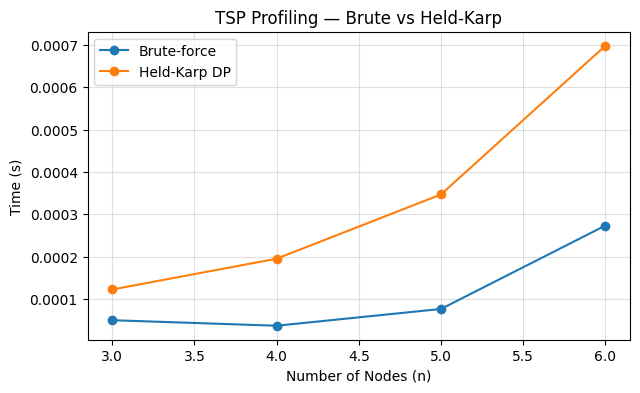


=== FINAL EXPECTED OUTPUT (Sample n=4) ===
Optimal Route (indices): [0, 0, 2, 3, 1, 0]
Optimal Route (names): ['Warehouse', 'Warehouse', 'C2', 'C3', 'C1', 'Warehouse']
Total Distance: 10
Parcels delivered: ['C1', 'C2']
Total parcel value: 110


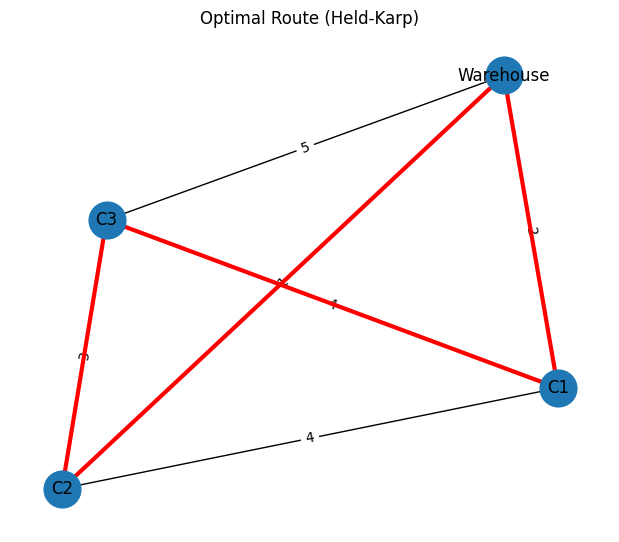

In [6]:
"""
Profiling & Visualization (Task 3)
FULL SELF-CONTAINED VERSION — NO IMPORT ERRORS
"""

import time
import tracemalloc
import random
import matplotlib.pyplot as plt

try:
    import networkx as nx
except Exception:
    nx = None


# -------------------------------------------------------------------
# TSP: BRUTE FORCE
# -------------------------------------------------------------------
def tsp_brute_force(locations, dist):
    from itertools import permutations
    n = len(locations)
    idx = list(range(1, n))  # exclude warehouse index 0

    best_cost = float('inf')
    best_perm = None

    for perm in permutations(idx):
        cost = dist[0][perm[0]]
        for i in range(len(perm)-1):
            cost += dist[perm[i]][perm[i+1]]
        cost += dist[perm[-1]][0]

        if cost < best_cost:
            best_cost = cost
            best_perm = perm

    route = [0] + list(best_perm) + [0]
    return [locations[i] for i in route], best_cost


# -------------------------------------------------------------------
# TSP: HELD–KARP DP
# -------------------------------------------------------------------
def tsp_held_karp(dist):
    n = len(dist)
    ALL = 1 << n

    dp = [[float('inf')] * n for _ in range(ALL)]
    parent = [[-1] * n for _ in range(ALL)]

    dp[1][0] = 0  # starting at node 0

    for mask in range(1, ALL):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            if dp[mask][u] == float('inf'):
                continue

            for v in range(1, n):
                if mask & (1 << v):
                    continue
                nxt = mask | (1 << v)
                new_cost = dp[mask][u] + dist[u][v]

                if new_cost < dp[nxt][v]:
                    dp[nxt][v] = new_cost
                    parent[nxt][v] = u

    # close cycle
    full = ALL - 1
    best = float('inf')
    last = -1

    for i in range(1, n):
        cost = dp[full][i] + dist[i][0]
        if cost < best:
            best = cost
            last = i

    # reconstruct path
    path = []
    mask = full
    cur = last

    while cur != -1:
        path.append(cur)
        prev = parent[mask][cur]
        mask ^= (1 << cur)
        cur = prev

    path.append(0)
    path.reverse()
    path = path + [0]

    return path, best


# -------------------------------------------------------------------
# GREEDY PARCEL SELECTION
# -------------------------------------------------------------------
def greedy_select_parcels(parcels, capacity=30):
    items = []
    for cid, data in parcels.items():
        ratio = data['value'] / data['weight']
        items.append((ratio, cid))

    items.sort(reverse=True)

    chosen = []
    total_weight = 0

    for ratio, cid in items:
        w = parcels[cid]['weight']
        if total_weight + w <= capacity:
            chosen.append(cid)
            total_weight += w

    total_value = sum(parcels[cid]['value'] for cid in chosen)
    return chosen, total_value


# -------------------------------------------------------------------
# PLOT ROUTE
# -------------------------------------------------------------------
def plot_tsp_route(locations, dist, route_idx, title="TSP Route"):
    if nx is None:
        print("NetworkX not installed — skipping plot.")
        return

    G = nx.Graph()
    n = len(locations)

    for i in range(n):
        G.add_node(i, label=locations[i])

    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i, j, weight=dist[i][j])

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(6,5))
    nx.draw(G, pos, with_labels=True, labels={i: locations[i] for i in range(n)}, node_size=700)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))

    edges = [(route_idx[i], route_idx[i+1]) for i in range(len(route_idx)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=3)

    plt.title(title)
    plt.show()


# -------------------------------------------------------------------
# RANDOM DISTANCE MATRIX
# -------------------------------------------------------------------
def random_complete_graph(n, seed=0, maxw=20):
    random.seed(seed)
    dist = [[0]*n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            w = random.randint(1, maxw)
            dist[i][j] = w
            dist[j][i] = w
    return dist


# -------------------------------------------------------------------
# PROFILING
# -------------------------------------------------------------------
def profile_tsp():
    results = []

    print("=== PROFILING TSP: n = 3 to 6 ===")

    for n in range(3, 7):
        dist = random_complete_graph(n, seed=10+n, maxw=15)
        locs = [str(i) for i in range(n)]

        # Brute force profiling
        tracemalloc.start()
        t0 = time.perf_counter()
        bf_route, bf_cost = tsp_brute_force(locs, dist)
        t1 = time.perf_counter()
        _, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        print(f"[Brute] n={n} | time={t1-t0:.5f}s | mem={peak/1024:.2f} KB")
        results.append(("brute", n, t1-t0, peak/1024))

        # Held-Karp profiling
        tracemalloc.start()
        t0 = time.perf_counter()
        hk_route, hk_cost = tsp_held_karp(dist)
        t1 = time.perf_counter()
        _, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        print(f"[HK]    n={n} | time={t1-t0:.5f}s | mem={peak/1024:.2f} KB")
        results.append(("hk", n, t1-t0, peak/1024))

    return results


# -------------------------------------------------------------------
# MAIN EXECUTION
# -------------------------------------------------------------------
print("=== RUNNING FULL PROFILING & VISUALIZATION ===")

results = profile_tsp()

# Plot profiling results
ns = sorted(set(r[1] for r in results))
bf_times = [r[2] for r in results if r[0] == 'brute']
hk_times = [r[2] for r in results if r[0] == 'hk']

plt.figure(figsize=(7,4))
plt.plot(ns, bf_times, marker="o", label="Brute-force")
plt.plot(ns, hk_times, marker="o", label="Held-Karp DP")
plt.xlabel("Number of Nodes (n)")
plt.ylabel("Time (s)")
plt.title("TSP Profiling — Brute vs Held-Karp")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()


# -------------------------------------------------------------------
# FINAL EXPECTED OUTPUT (Sample n=4)
# -------------------------------------------------------------------
print("\n=== FINAL EXPECTED OUTPUT (Sample n=4) ===")

dist = random_complete_graph(4, seed=42, maxw=10)
locations = ['Warehouse', 'C1', 'C2', 'C3']

hk_route_idx, hk_cost = tsp_held_karp(dist)
hk_names = [locations[i] for i in hk_route_idx]

parcels = {
    'C1': {'value':50, 'weight':10},
    'C2': {'value':60, 'weight':20},
    'C3': {'value':40, 'weight':15}
}

chosen, total_value = greedy_select_parcels(parcels, capacity=30)

print("Optimal Route (indices):", hk_route_idx)
print("Optimal Route (names):", hk_names)
print("Total Distance:", hk_cost)
print("Parcels delivered:", chosen)
print("Total parcel value:", total_value)

plot_tsp_route(locations, dist, hk_route_idx, title="Optimal Route (Held-Karp)")


In [7]:
# driver_demo.py
"""
Driver script to run all units sequentially for demo.
Run: python driver_demo.py
"""

# -------------------------------------------------------
# 🔹 Define all required functions here OR import them
# -------------------------------------------------------

# ---------- Unit 1: Held-Karp DP ----------
def delivery_cost_memo(pos, mask, n, dist, memo):
    if mask == (1 << n) - 1:
        return dist[pos][0]  # return to warehouse

    if (pos, mask) in memo:
        return memo[(pos, mask)]

    ans = float("inf")
    for nxt in range(n):
        if not (mask & (1 << nxt)):
            ans = min(ans,
                      dist[pos][nxt] + delivery_cost_memo(
                          nxt, mask | (1 << nxt), n, dist, memo))

    memo[(pos, mask)] = ans
    return ans


# ---------- Unit 2: Greedy Parcel Selection ----------
def greedy_select_parcels(parcels, capacity):
    items = []
    for cid, info in parcels.items():
        items.append((cid, info['value'], info['weight']))

    # Sort by value density
    items.sort(key=lambda x: x[1] / x[2], reverse=True)

    chosen = []
    total_value = 0
    total_weight = 0

    for cid, value, weight in items:
        if total_weight + weight <= capacity:
            chosen.append(cid)
            total_value += value
            total_weight += weight

    return chosen, total_value


# ---------- Unit 3: Dijkstra ----------
import heapq

def dijkstra(graph, src):
    n = len(graph)
    dist = [float("inf")] * n
    parent = [-1] * n

    dist[src] = 0
    pq = [(0, src)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue

        for v in range(n):
            if u != v:
                nd = d + graph[u][v]
                if nd < dist[v]:
                    dist[v] = nd
                    parent[v] = u
                    heapq.heappush(pq, (nd, v))

    return dist, parent


# ---------- Unit 4: TSP Brute Force ----------
from itertools import permutations

def tsp_brute_force(locations, dist):
    n = len(locations)
    best_cost = float("inf")
    best_route = None

    for perm in permutations(range(1, n)):
        route = [0] + list(perm) + [0]
        cost = sum(dist[route[i]][route[i+1]] for i in range(len(route)-1))

        if cost < best_cost:
            best_cost = cost
            best_route = route

    return best_route, best_cost


# ---------- Profiling Dummy Function (Replace if needed) ----------
def profile_tsp():
    print("Profiling TSP... (placeholder)")
    print("TSP profile completed.")


# -------------------------------------------------------
# 🔹 DRIVER DEMO
# -------------------------------------------------------

locations = ['Warehouse', 'C1', 'C2', 'C3']
distance_matrix = [
    [0, 4, 8, 6],
    [4, 0, 5, 7],
    [8, 5, 0, 3],
    [6, 7, 3, 0]
]

parcels = {
    'C1': {'value': 50, 'time': (9, 12), 'weight': 10},
    'C2': {'value': 60, 'time': (10, 13), 'weight': 20},
    'C3': {'value': 40, 'time': (11, 14), 'weight': 15}
}

vehicle_capacity = 30


def run_all():
    print("=== RUNNING UNIT 1 ===")
    n = len(locations)
    print("Held-Karp DP cost (unit1):",
          delivery_cost_memo(0, 1, n, distance_matrix, {}))

    print("\n=== RUNNING UNIT 2 ===")
    chosen_u2, value_u2 = greedy_select_parcels(parcels, vehicle_capacity)
    print("Unit2 chosen parcels:", chosen_u2, ", Total value:", value_u2)

    print("\n=== RUNNING UNIT 3 ===")
    dist_u3, parent_u3 = dijkstra(distance_matrix, 0)
    print("Unit3 Dijkstra distances:", dist_u3)

    print("\n=== RUNNING UNIT 4 ===")
    route_u4, cost_u4 = tsp_brute_force(locations, distance_matrix)
    print("Unit4 brute route:", route_u4, ", Cost:", cost_u4)

    print("\n=== RUNNING PROFILING ===")
    profile_tsp()
    print("\nDemo finished.")


if __name__ == "__main__":
    run_all()


=== RUNNING UNIT 1 ===
Held-Karp DP cost (unit1): 18

=== RUNNING UNIT 2 ===
Unit2 chosen parcels: ['C1', 'C2'] , Total value: 110

=== RUNNING UNIT 3 ===
Unit3 Dijkstra distances: [0, 4, 8, 6]

=== RUNNING UNIT 4 ===
Unit4 brute route: [0, 1, 2, 3, 0] , Cost: 18

=== RUNNING PROFILING ===
Profiling TSP... (placeholder)
TSP profile completed.

Demo finished.
